<p><b>Описание проекта</b></p>
<p></p>
<p>Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.</p>
<p>Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.</p>
<p>Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
<p>Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.</p>
<p>А именно:</p>
<li>научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
<li>сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
<li>проанализировать основные признаки, наиболее сильно влияющие на отток;
<li>сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:<ol>
<li>выделить целевые группы клиентов;
<li>предложить меры по снижению оттока;
<li>определить другие особенности взаимодействия с клиентами.</ol>


<p><b>Инструкция по выполнению проекта</b></p>
<p><b>Шаг 1. </b></p><p>Загрузите данные</p>
«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. 
<p><b>Шаг 2.</b> <p>Проведите исследовательский анализ данных (EDA)</p>
<li>Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
<li>Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
<li>Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
<li>Постройте матрицу корреляций и отобразите её.</p>
<p><b>Шаг 3.</b> <p>Постройте модель прогнозирования оттока клиентов</p>
<li>Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
<li>Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
<li>Обучите модель на train-выборке двумя способами:
<ul><li>логистической регрессией,
<li>случайным лесом.</ul>
<li>Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?</p>
Не забудьте указать параметр random_state при разделении выборки и задании алгоритма.
<p><b>Шаг 4.</b> <p>Сделайте кластеризацию клиентов</p>
<li>Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):
<li>Стандартизируйте данные.
<li>Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
<li>Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
<li>Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
<li>Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
<li>Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?</p>
<p><b>Шаг 5.</b> <p>Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами</p>
<li>Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания.
<li>Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.</p>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<p><b>Шаг 1. </b></p><p>Загрузите данные</p>

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')

In [4]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Набор данных включает следующие поля:
<p><li>'Churn' — факт оттока в текущем месяце;</p>
<p>Текущие поля в датасете:</p>
<p>Данные клиента за предыдущий до проверки факта оттока месяц:</p>
<p><li>'gender' — пол;
<li>'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
<li>'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
<li>Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
<li>'Phone' — наличие контактного телефона;
<li>'Age' — возраст;
<li>'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).</p>
<p></p>
    <p>Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:</p>
<p><li>'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
<li>'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
<li>'Group_visits' — факт посещения групповых занятий;
<li>'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
<li>'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
<li>'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.</p>

Приведу названия столбцов к нижнему регистру.

In [5]:
df.columns = df.columns.str.lower()

<p><b>Шаг 2.</b> <p>Проведите исследовательский анализ данных (EDA)</p>
<li>Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());

In [6]:
df.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

Пропущенных значений нет.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Средний возраст посетителей 29 лет. Среднее время жизни клиента почти 4 месяца.

<li>Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());

In [8]:
df_mean = df.groupby('churn', as_index=False).mean()
df_mean

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Видна разница в возрасте. Ушедшие моложе на 3 года (27 лет) и имеют более краткосрочный контракт (3 месяца). Уходящие отходили только половину купленного времени с частотой 1 раз в неделю против 2 у оставшихся. Среднее время жизни ушедших клиентов 1 месяц.

<li>Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

In [9]:
col = df.columns[:13]
col

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month'],
      dtype='object')

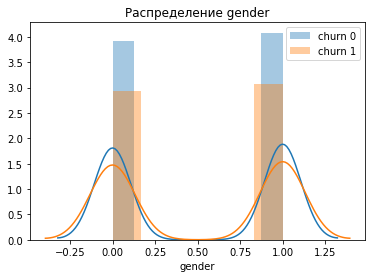

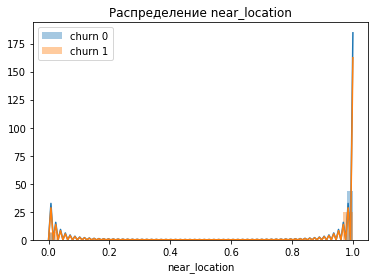

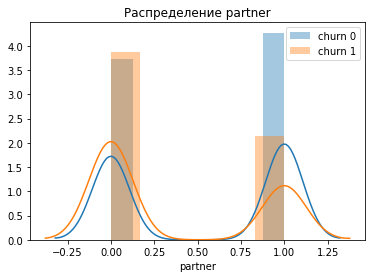

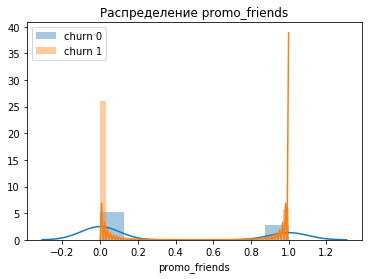

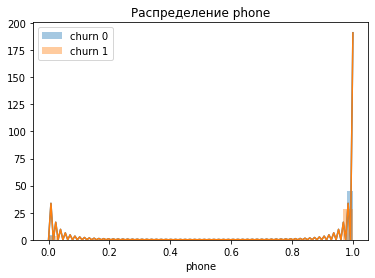

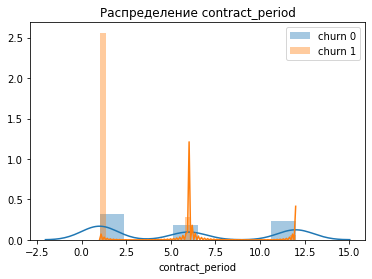

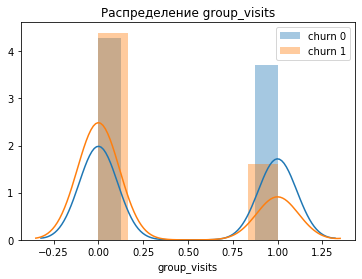

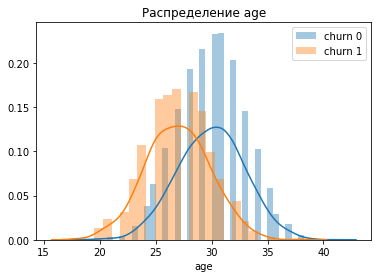

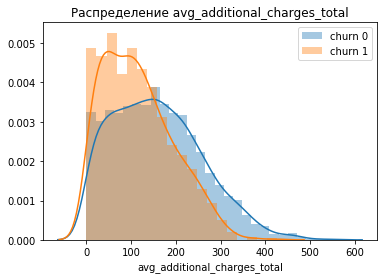

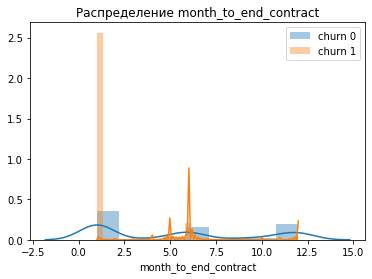

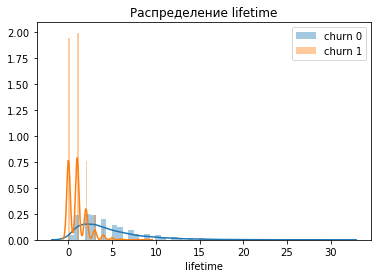

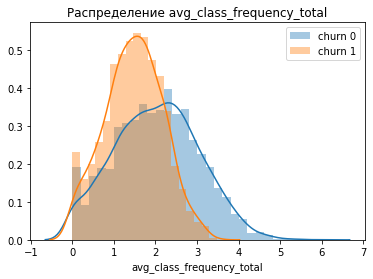

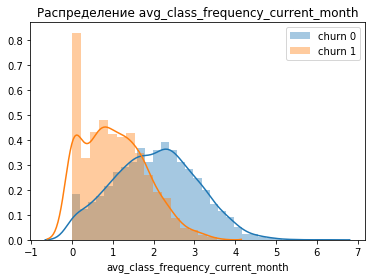

In [10]:
for sign in col:
    sns.distplot(df.query('churn == 0')[sign])
    sns.distplot(df.query('churn == 1')[sign])
    plt.title('Распределение {}'.format(sign))
    plt.legend(labels=['churn 0', 'churn 1'])
    plt.show()

Среди ушедших и оставшихся распределение пола почти поровну. В общем, ушедшие характеризуются следующими признаками: их телефонов в базе данных больше всего, контракты краткосрочные (до 3 месяцев), индивидуальные тренировки, возраст 26 лет, суммарная выручка около 100, срок активности до 2 месяцев, количество посещений меньше, чем у оставшихся (1 против 2-3).

<li>Постройте матрицу корреляций и отобразите её.</p>

In [11]:
df_cor = df.corr()
df_cor

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


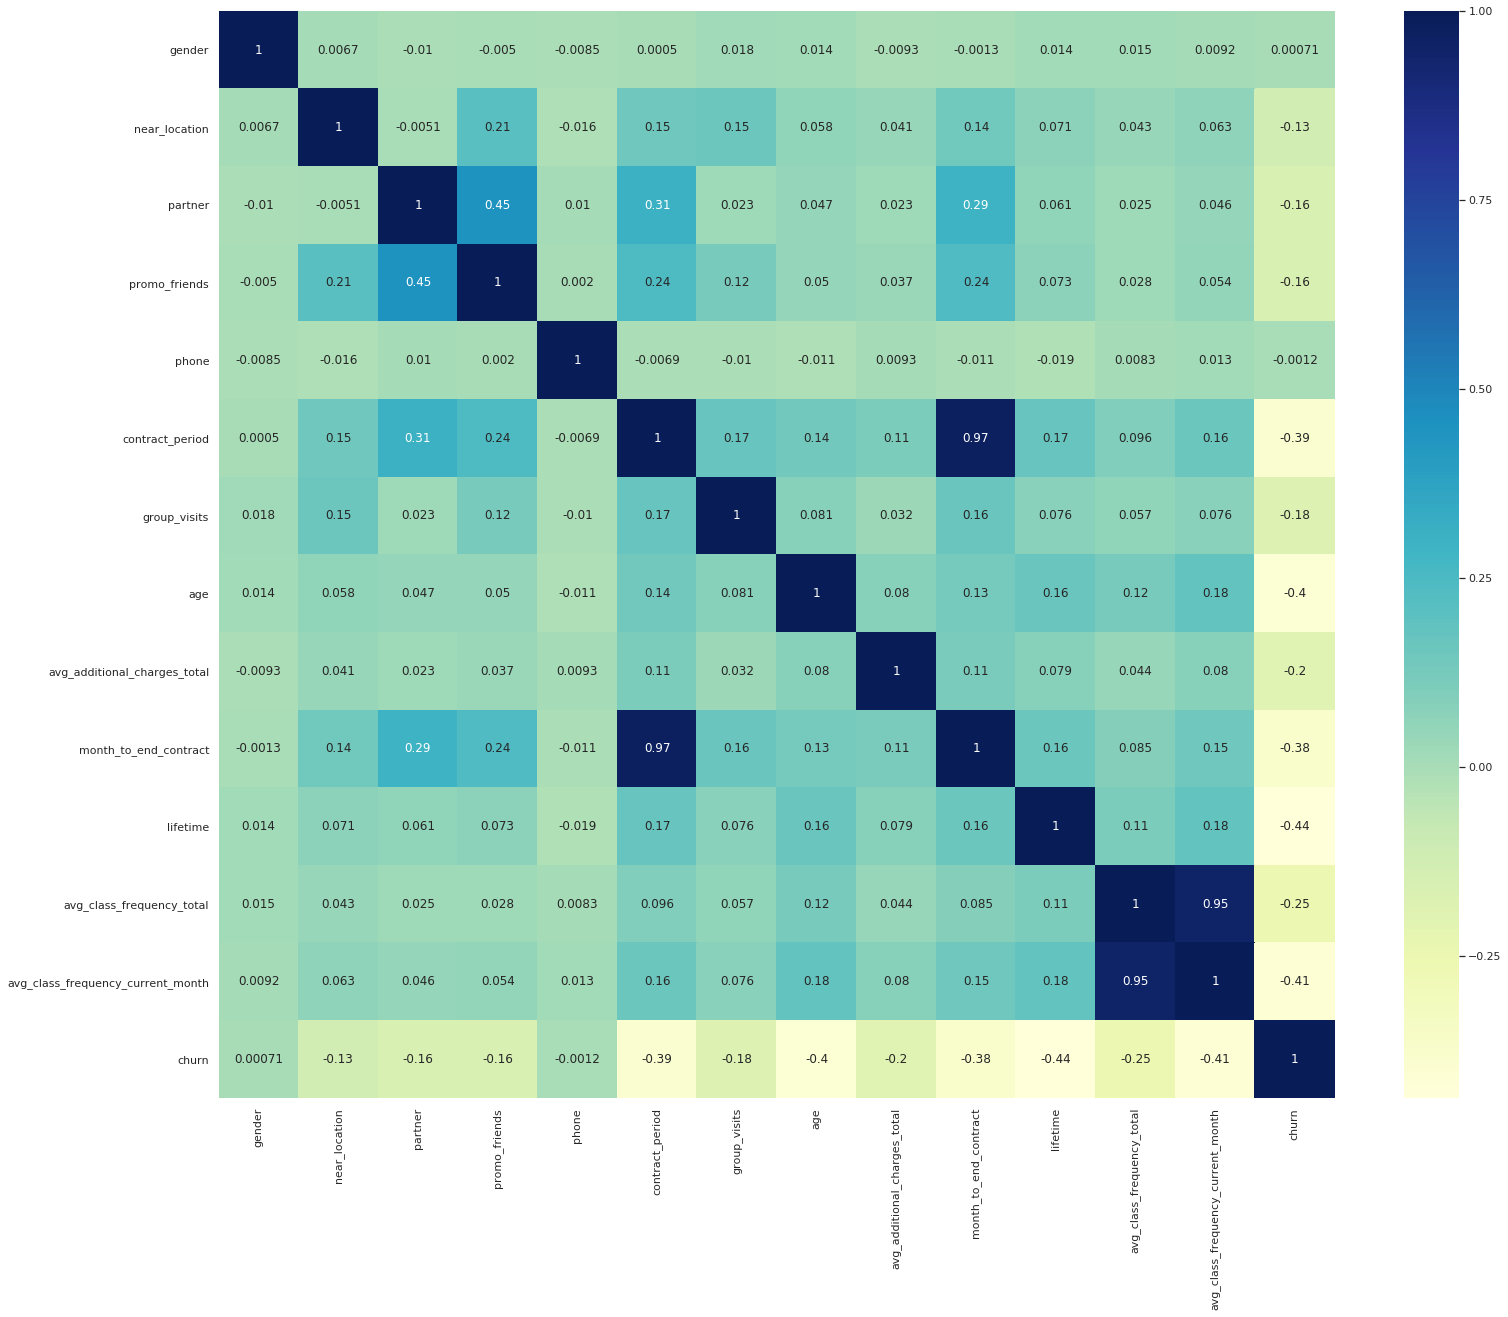

In [32]:
plt.figure(figsize=(25,20))
sns.heatmap(df_cor, annot = True, fmt='.2g', cmap= 'YlGnBu')
sns.set(font_scale=8)
plt.show()

Видна сильная корреляция между признаками 'Avg_class_frequency_total' и 'Avg_class_frequency_current_month', что естественно (тк среднее число посещений в месяц прямо зависит от среднего числа посещений в неделю) и между признаками 'Month_to_end_contract' и 'Contract_period', что также естественно. Других значимых корреляций нет.

In [13]:
df = df.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis = 1)

In [14]:
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0


<p><b>Шаг 3.</b> <p>Постройте модель прогнозирования оттока клиентов</p>
<li>Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

In [15]:
X = df.drop('churn', axis = 1) # Обучающие признаки
y = df['churn'] # Целевая переменная

<li>Разбейте данные на обучающую и валидационную выборку функцией train_test_split().

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

<li>Обучите модель на train-выборке двумя способами:
<ul><li>логистической регрессией,
<li>случайным лесом.</ul>

Сначала проведу стандартизацию признаков.

In [17]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

In [18]:
lr_model = LogisticRegression()
rf_model = RandomForestRegressor()
lr_model.fit(X_train_st, y_train)
rf_model.fit(X_train_st, y_train)
y_pred_lr = lr_model.predict(X_test_st)
y_pred_rf = rf_model.predict(X_test_st).round()

<li>Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?</p>
Не забудьте указать параметр random_state при разделении выборки и задании алгоритма.

In [19]:
def metrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred).round(2)
    precision = precision_score (y_test, y_pred).round(2)
    recall = recall_score (y_test, y_pred).round(2)
    f1= f1_score(y_test, y_pred).round(2)
    return acc, precision, recall, f1

In [20]:
print('Accuracy Logistic Regression {}'.format(metrics(y_test, y_pred_lr)[0]))
print('Accuracy Random Forest {}'.format(metrics(y_test, y_pred_rf)[0]))

print('Precision Logistic Regression {}'.format(metrics(y_test, y_pred_lr)[1]))
print('Precision Random Forest {}'.format(metrics(y_test, y_pred_rf)[1]))

print('Recall Logistic Regression {}'.format(metrics(y_test, y_pred_lr)[2]))
print('Recall Random Forest {}'.format(metrics(y_test, y_pred_rf)[2]))

print('F1 Logistic Regression {}'.format(metrics(y_test, y_pred_lr)[3]))
print('F1 Random Forest {}'.format(metrics(y_test, y_pred_rf)[3]))

Accuracy Logistic Regression 0.91
Accuracy Random Forest 0.88
Precision Logistic Regression 0.83
Precision Random Forest 0.82
Recall Logistic Regression 0.83
Recall Random Forest 0.7
F1 Logistic Regression 0.83
F1 Random Forest 0.75


На основании метрик, можно сказать, что модель Logistic Regression имеет большую точность, чем модель Random Forest.

In [21]:
report = classification_report(y_test, y_pred_lr, target_names=['Non-churned', 'Churned'])
print(report)

              precision    recall  f1-score   support

 Non-churned       0.94      0.94      0.94       588
     Churned       0.83      0.83      0.83       212

    accuracy                           0.91       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.91      0.91      0.91       800



In [22]:
report = classification_report(y_test, y_pred_rf, target_names=['Non-churned', 'Churned'])
print(report)

              precision    recall  f1-score   support

 Non-churned       0.90      0.94      0.92       588
     Churned       0.82      0.70      0.75       212

    accuracy                           0.88       800
   macro avg       0.86      0.82      0.84       800
weighted avg       0.88      0.88      0.88       800



<p><b>Шаг 4.</b> <p>Сделайте кластеризацию клиентов</p>
<li>Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):

<li>Стандартизируйте данные.

In [23]:
sc = StandardScaler()
X_sc = sc.fit_transform(df.drop(columns = 'churn'))

<li>Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.

In [24]:
linked = linkage(X_sc, method = 'ward') 

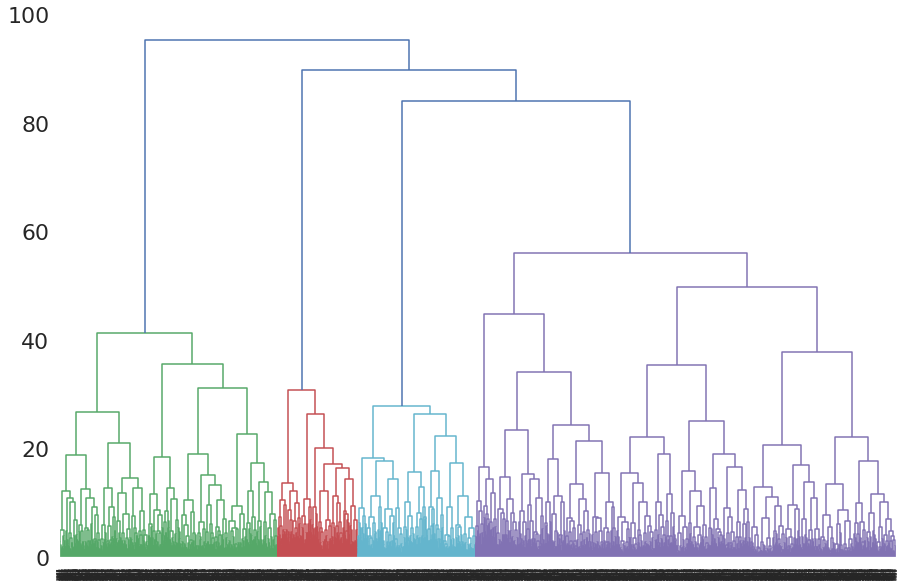

In [25]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Можно выделить 4 кластера.

<li>Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).

In [26]:
km = KMeans(n_clusters = 5, random_state=0) # задаём число кластеров, равное 5
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

<li>Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [27]:
# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

In [28]:
# выводим статистику по средним значениям наших признаков по кластеру
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,,
0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,4.380952,1.978963,0.120952
2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,3.343640,1.800647,0.381625
3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,3.761194,1.941342,0.200918
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


Самые высокие средние значения в нулевом кластере.

<li>Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

In [29]:
col = df.columns[:13]
col

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total',
       'churn', 'cluster_km'],
      dtype='object')

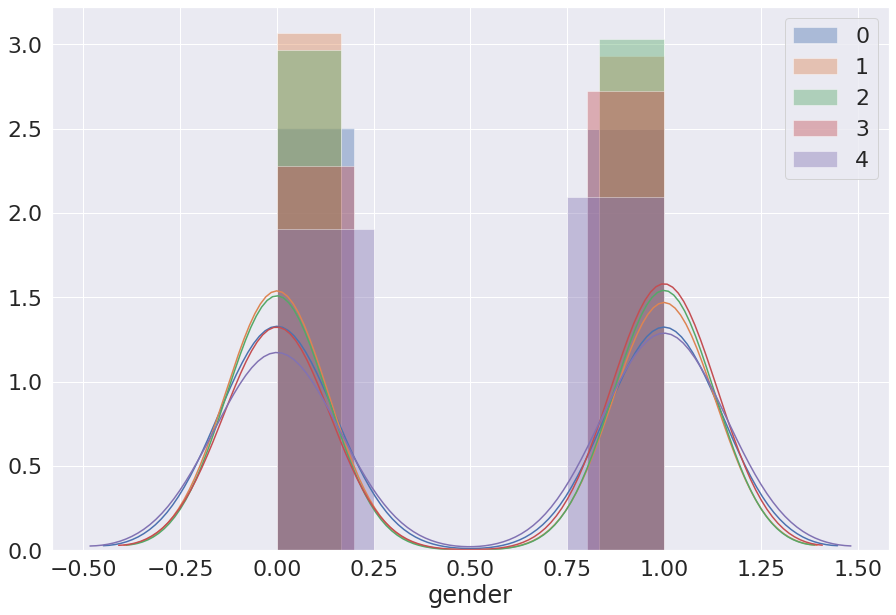

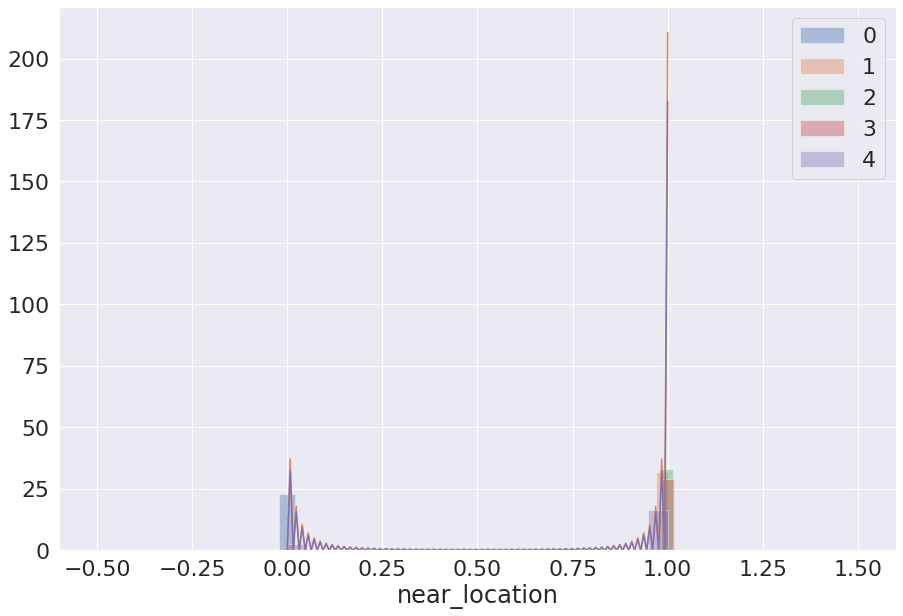

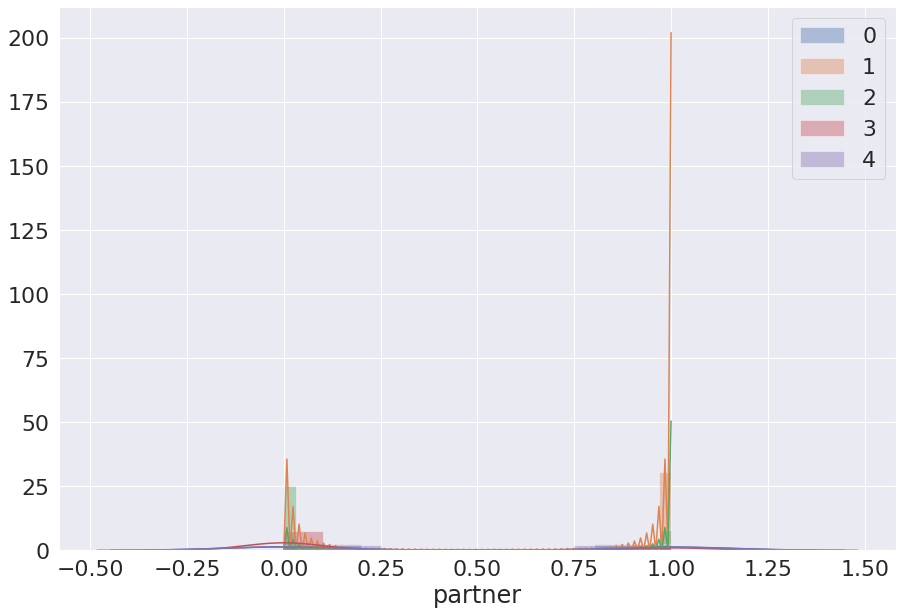

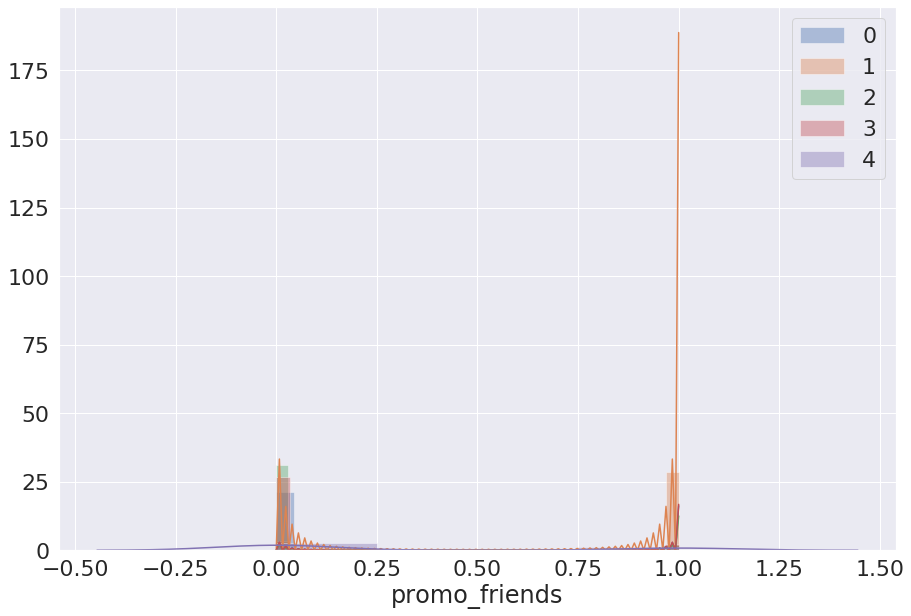

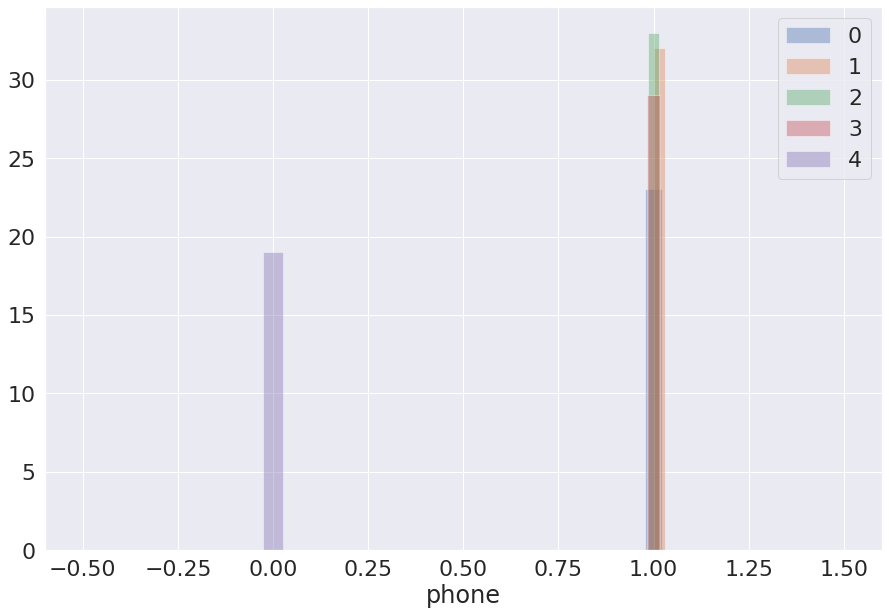

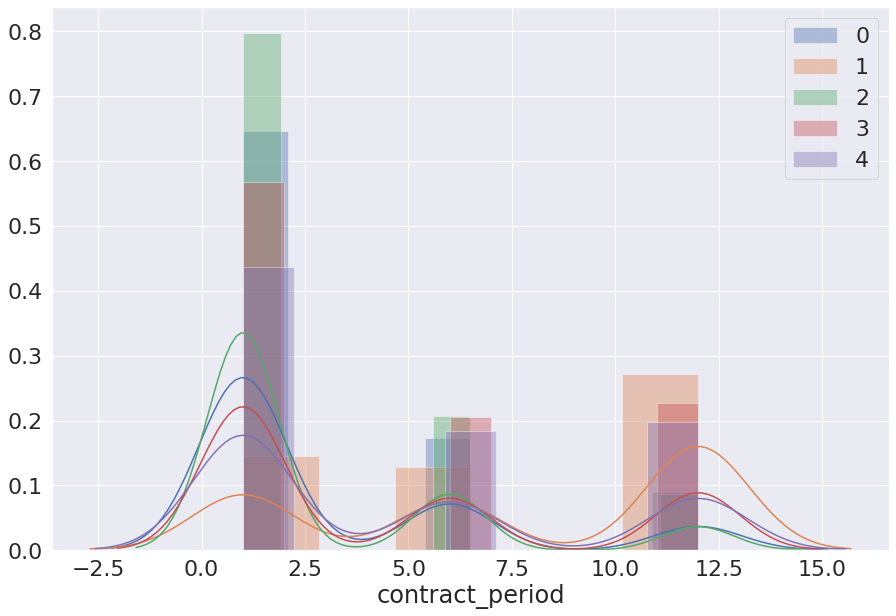

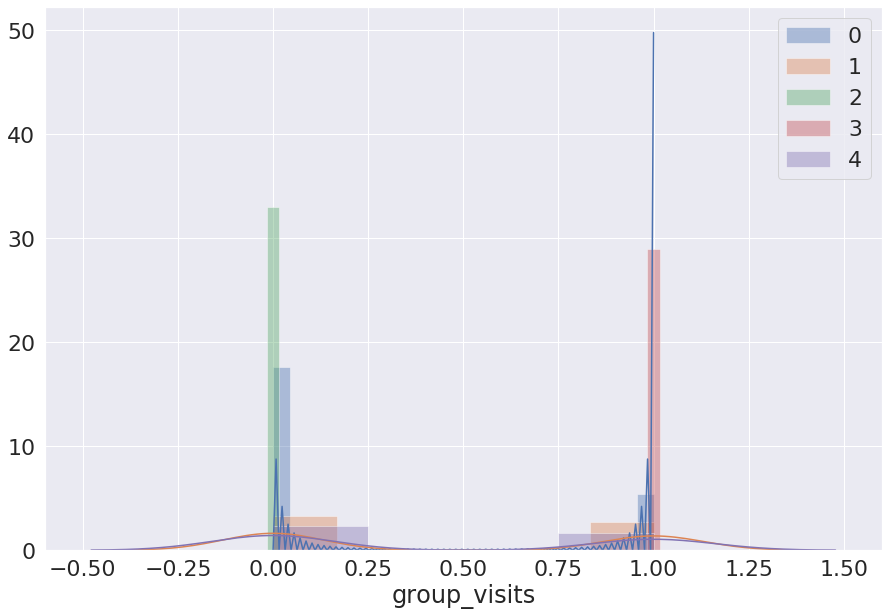

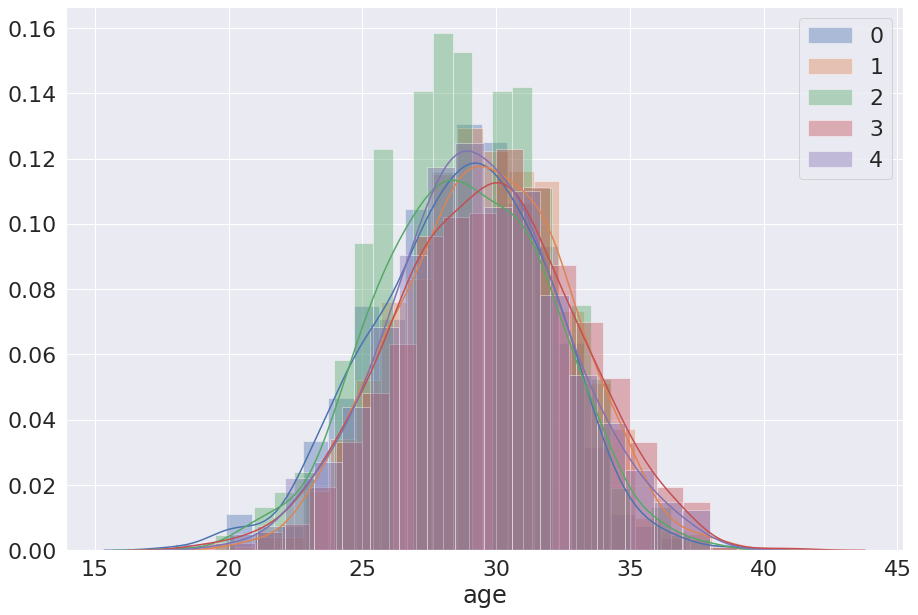

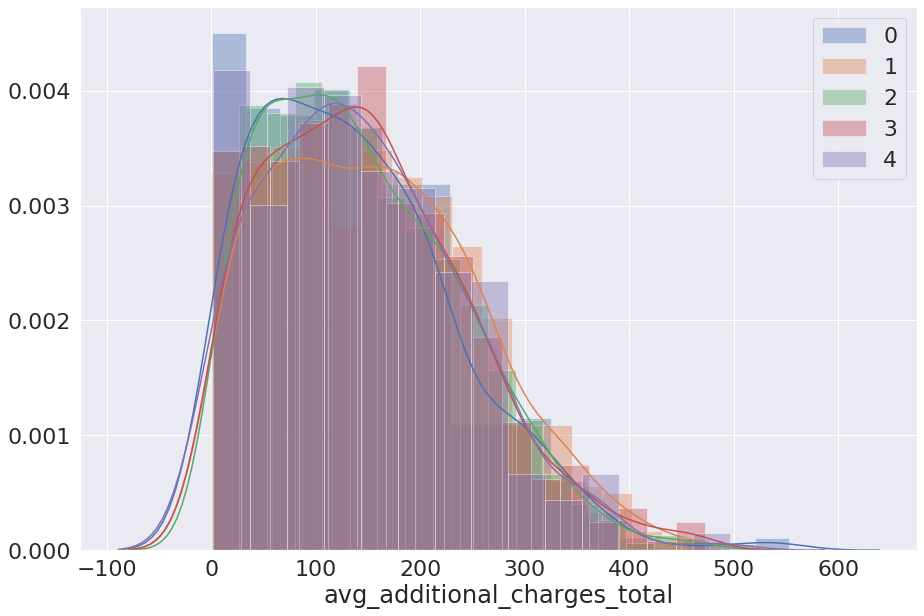

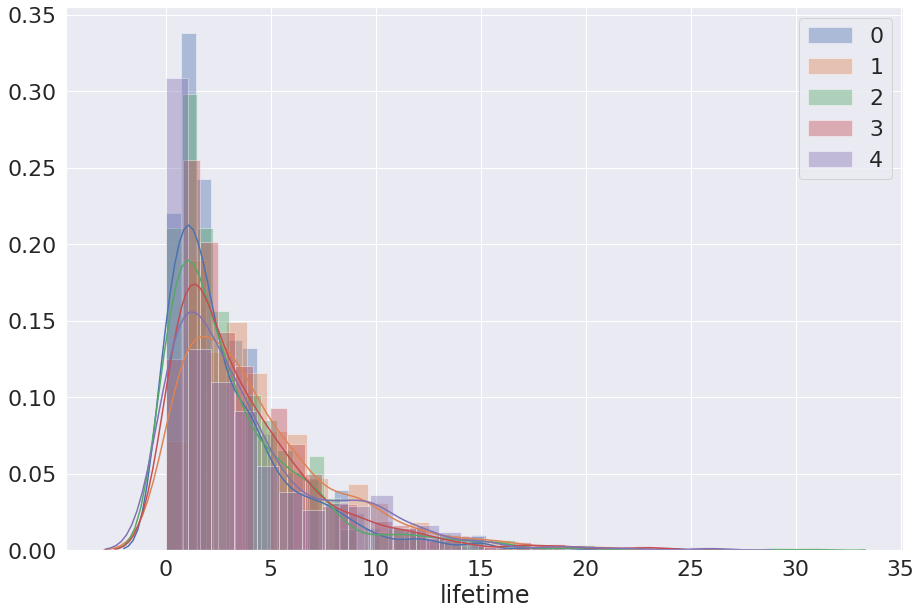

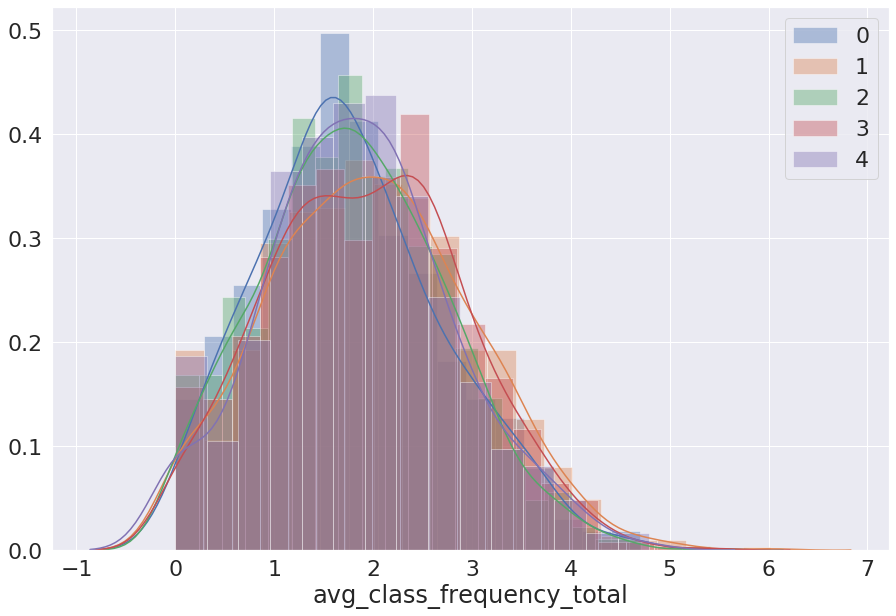

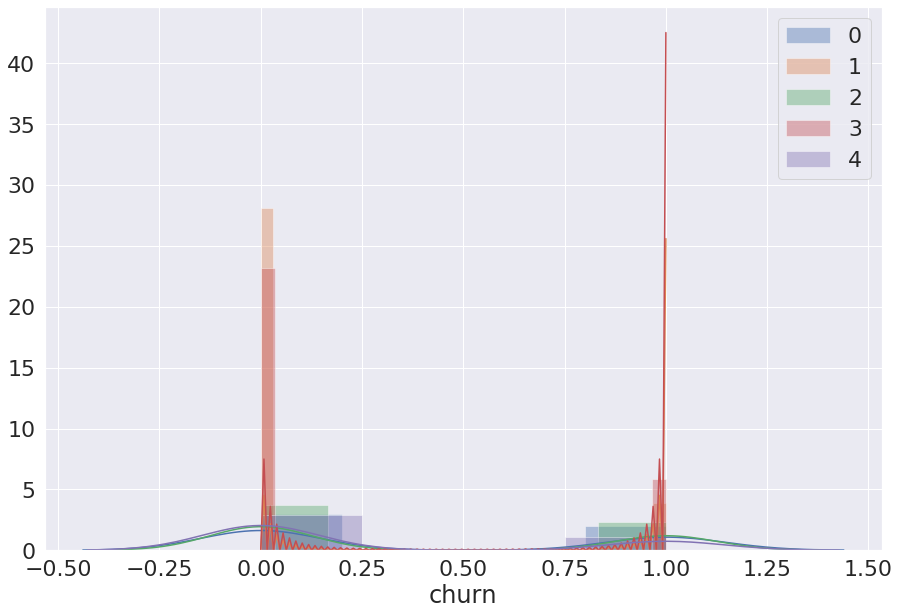

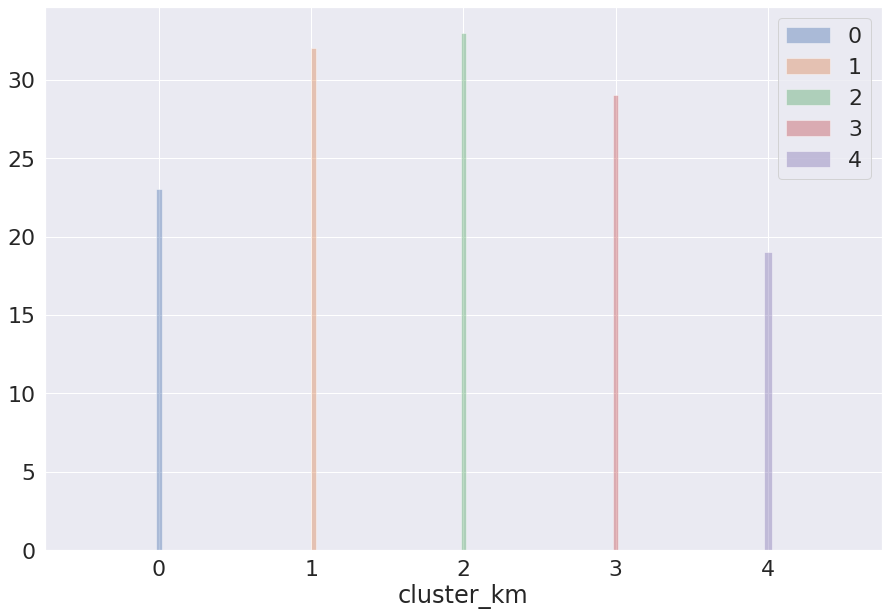

In [30]:
col = df.columns[:13]
col
cluster_km = [0, 1, 2, 3, 4]

for sign in col:
    plt.figure(figsize=(15,10))
    for number in cluster_km:
        data = df.query('cluster_km == @number')
        fig = sns.distplot(data[sign])
        plt.legend(cluster_km)
    plt.show()
sns.set(font_scale=1)        
        #plt.title('Распределение {}'.format(sign))
        #plt.show()
#legend = plt.legend()
#plt.show()

<li>Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?</p>

In [31]:
df.groupby('cluster_km').agg({'churn':'mean'})

,churn
cluster_km,
0,0.399287
1,0.120952
2,0.381625
3,0.200918
4,0.266839


0 и 4 кластеры более надежны, доля оттока у них минимальная (0.02 и 0.06 соответственно). 1,2 и 5 кластеры более склонны к оттоку, доля оттока у них 0.2, 0.44 и 0.51 соответственно.

<p><b>Шаг 5.</b> <p>Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами</p>
<li>Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания.
<li>Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.</p>

<p>Анализируя средние значения признаков у кластеров, наименее подверженных оттоку (кластеры 0 и 4) можно составить "портрет" такого типичного посетителя:</p><ul>
<li>пол мужчина или женщина;
<li>проживает или работает недалеко от фитнес-центра;     
<li>оставляет контактный телефон;
<li>контрактный период 3 или 12 месяцев;
<li>возраст около 30 лет;    
<li>активно покупающий прочие услуги фитнес-центра;
<li>занимающийся не менее 5 месяцев;    
<li>частота посещений 2-3 раза в неделю, 2-3 раза в месяц;    

</ul>


<p>Анализируя средние значения признаков у кластеров, наиболее подверженных оттоку (кластеры 1,2 и 3) можно составить "портрет" такого типичного посетителя:</p><ul>
<li>пол мужчина или женщина;
<li>контрактный период до полугода;
<li>возраст около 29 лет;    
<li>покупающий прочие услуги фитнес-центра;
<li>занимающийся 2-4 месяца;    
<li>частота посещений 1-2 раза в неделю, 1-2 раза в месяц;    

</ul>

Рекомендации: после 2х месячного посещения мотивация клиента начинает снижаться, поэтому в этот период нужно применять маркетинговые акции. Акция "приведи друга" не даёт значимого прироста клиентов. Как источник идей можно использовать этот https://consultingforfitness.ru/30-nailuchshix-sposobov-motivirovat-posetitelej-fitnes-kluba/.